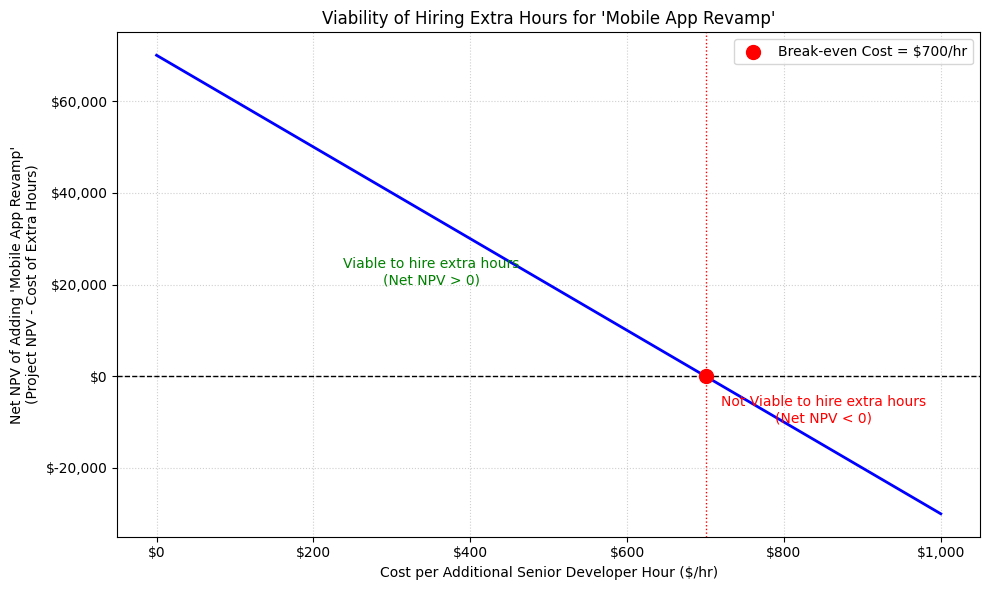

Project NPV (Benefit): $70,000
Additional Hours Required: 100
Maximum Viable Cost per Additional Hour (Break-even): $700.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Parameters for the decision to add Mobile App Revamp ---
npv_mobile_revamp = 70000
hours_needed_mobile = 750
# From Extension 1, hours used by optimal set was 2350
hours_remaining_original = 3000 - 2350
hours_shortfall = hours_needed_mobile - hours_remaining_original # 750 - 650 = 100

# --- Range for Cost per Hour ---
# Let's test costs from $0 up to $1000 per hour
cost_per_hour_values = np.linspace(0, 1000, 100)

# --- Calculate Net NPV of the Decision ---
# Net NPV = Project NPV - (Hours Shortfall * Cost per Hour)
net_npv_of_adding = npv_mobile_revamp - (hours_shortfall * cost_per_hour_values)

# --- Calculate Break-even Cost per Hour ---
# Net NPV = 0 => npv_mobile_revamp = hours_shortfall * breakeven_cost
breakeven_cost_per_hour = npv_mobile_revamp / hours_shortfall # 70000 / 100 = 700

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot the Net NPV line
plt.plot(cost_per_hour_values, net_npv_of_adding, color='blue', linewidth=2)

# Add horizontal line at zero (break-even decision threshold)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Mark the break-even point
plt.scatter(breakeven_cost_per_hour, 0, color='red', s=100, zorder=5, label=f'Break-even Cost = ${breakeven_cost_per_hour:.0f}/hr')
plt.axvline(breakeven_cost_per_hour, color='red', linestyle=':', linewidth=1)


# --- Formatting ---
plt.xlabel("Cost per Additional Senior Developer Hour ($/hr)")
plt.ylabel("Net NPV of Adding 'Mobile App Revamp'\n(Project NPV - Cost of Extra Hours)")
plt.title("Viability of Hiring Extra Hours for 'Mobile App Revamp'")
plt.grid(True, linestyle=':', alpha=0.6)

# Format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'))


# Add annotations explaining the regions
plt.annotate('Viable to hire extra hours\n(Net NPV > 0)',
             xy=(breakeven_cost_per_hour / 2, 20000), # Position in the positive region
             xycoords='data', ha='center', color='green')
plt.annotate('Not Viable to hire extra hours\n(Net NPV < 0)',
             xy=(breakeven_cost_per_hour + (1000-breakeven_cost_per_hour)/2, -10000), # Position in the negative region
             xycoords='data', ha='center', color='red')


plt.legend()
plt.tight_layout()
plt.show()

print(f"Project NPV (Benefit): ${npv_mobile_revamp:,.0f}")
print(f"Additional Hours Required: {hours_shortfall:.0f}")
print(f"Maximum Viable Cost per Additional Hour (Break-even): ${breakeven_cost_per_hour:.2f}")